In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Paris_Entire-Home-Apt.csv')
df.head(5)

C:\Users\joker\AppData\Local\Temp\ipykernel_26408\103643887.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Paris_Entire-Home-Apt.csv')


Unnamed: 0.1  Unnamed: 0      id                          listing_url  \
0             0           0    3109    https://www.airbnb.com/rooms/3109   
1             1           1    5396    https://www.airbnb.com/rooms/5396   
2             2           2    7397    https://www.airbnb.com/rooms/7397   
3             3           3    7964    https://www.airbnb.com/rooms/7964   
4             4           4  241715  https://www.airbnb.com/rooms/241715   

  last_scraped                                        description  host_id  \
0   2024-09-11  Lovely Appartment with one bedroom with a Quee...     3631   
1   2024-09-13  NEW SOFA-BED SINCE JUNE 2023, Please disregard...     7903   
2   2024-09-06          VERY CONVENIENT, WITH THE BEST LOCATION !     2626   
3   2024-09-10  We are renting our a spacious, sunny fully fur...    22155   
4   2024-09-11  Come to stay in our unique Parisian flat to en...  3342097   

                                    host_url  host_since host_response_time  \
0     https://www.airbnb.com/users/show/3631  2008-10-14     within an hour   
1     https://www.airbnb.com/users/show/7903  2009-02-14     within an hour   
2     https://www.airbnb.com/users/show/2626  2008-08-30     within an hour   
3    https://www.airbnb.com/users/show/22155  2009-06-18     within an hour   
4  https://www.airbnb.com/users/show/3342097  2012-08-22     within an hour   

   ... review_scores_checkin review_scores_communication  \
0  ...                  5.00                        5.00   
1  ...                  4.81                        4.84   
2  ...                  4.92                        4.89   
3  ...                  5.00                        5.00   
4  ...                  4.80                        4.83   

  review_scores_location        license instant_bookable  \
0                   5.00  7511409139079                t   
1                   4.96  7510402838018                f   
2                   4.93  7510400829623                f   
3                   5.00  7510903576564                f   
4                   4.81  7511913070313                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              1                                           1   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.05  
1                                           0              2.23  
2                                           0              2.20  
3                                           0              0.03  
4                                           0              1.09  

[5 rows x 52 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

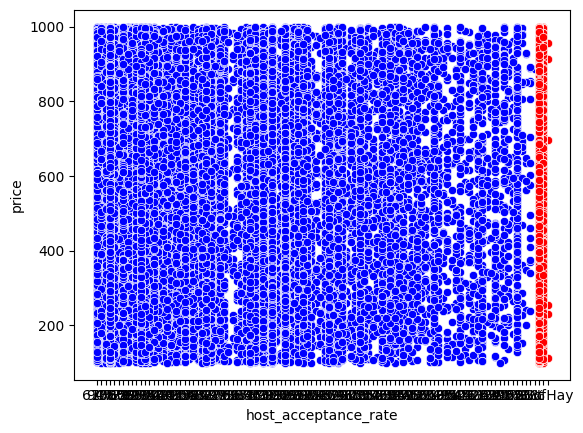

In [3]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [11]:
print(df.isna().sum())  # Verifica NaN por columna

Unnamed: 0.1                                    0
Unnamed: 0                                      0
id                                              0
listing_url                                     0
last_scraped                                    0
description                                     0
host_id                                         0
host_url                                        0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0


In [12]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [13]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [17]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.28803413]),
 'rank_': 1,
 'singular_': array([129.73657583]),
 'intercept_': np.float64(553.30211381478)}

In [18]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

8.154697092277452e-05

In [19]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([549.75913094, 548.33136173, 549.75913094, ..., 548.06696002,
       552.87907108, 548.06696002], shape=(85268,))

In [20]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0                   id  \
0        549.759131             0           0                 3109   
1        548.331362             1           1                 5396   
2        549.759131             2           2                 7397   
3        553.302114             3           3                 7964   
4        553.302114             4           4               241715   
...             ...           ...         ...                  ...   
85263    550.499456         95455       95455  1238563676697016528   
85264    548.066960         95456       95456  1238568635341928457   
85265    548.066960         95457       95457  1238594326004996232   
85266    552.879071         95459       95459  1239120896239244086   
85267    548.066960         95460       95460  1239136641042729451   

                                            listing_url last_scraped  \
0                     https://www.airbnb.com/rooms/3109   2024-09-11   
1                     https://www.airbnb.com/rooms/5396   2024-09-13   
2                     https://www.airbnb.com/rooms/7397   2024-09-06   
3                     https://www.airbnb.com/rooms/7964   2024-09-10   
4                   https://www.airbnb.com/rooms/241715   2024-09-11   
...                                                 ...          ...   
85263  https://www.airbnb.com/rooms/1238563676697016528   2024-09-13   
85264  https://www.airbnb.com/rooms/1238568635341928457   2024-09-13   
85265  https://www.airbnb.com/rooms/1238594326004996232   2024-09-11   
85266  https://www.airbnb.com/rooms/1239120896239244086   2024-09-13   
85267  https://www.airbnb.com/rooms/1239136641042729451   2024-09-11   

                                             description    host_id  \
0      Lovely Appartment with one bedroom with a Quee...       3631   
1      NEW SOFA-BED SINCE JUNE 2023, Please disregard...       7903   
2              VERY CONVENIENT, WITH THE BEST LOCATION !       2626   
3      We are renting our a spacious, sunny fully fur...      22155   
4      Come to stay in our unique Parisian flat to en...    3342097   
...                                                  ...        ...   
85263  Enjoy a stylish experience at this centrally l...   35084418   
85264  Forget your worries at this spacious (42m2) an...  539077658   
85265  Spacious 3 Bedroom Apartment - Close to Champs...  492686946   
85266  MIDTERM STAY ONLY - Located close to the mythi...  169497320   
85267                                                  0  564251645   

                                          host_url  host_since  ...  \
0           https://www.airbnb.com/users/show/3631  2008-10-14  ...   
1           https://www.airbnb.com/users/show/7903  2009-02-14  ...   
2           https://www.airbnb.com/users/show/2626  2008-08-30  ...   
3          https://www.airbnb.com/users/show/22155  2009-06-18  ...   
4        https://www.airbnb.com/users/show/3342097  2012-08-22  ...   
...                                            ...         ...  ...   
85263   https://www.airbnb.com/users/show/35084418  2015-06-05  ...   
85264  https://www.airbnb.com/users/show/539077658  2023-09-26  ...   
85265  https://www.airbnb.com/users/show/492686946  2022-12-25  ...   
85266  https://www.airbnb.com/users/show/169497320  2018-01-23  ...   
85267  https://www.airbnb.com/users/show/564251645  2024-02-27  ...   

      review_scores_checkin review_scores_communication  \
0                      5.00                        5.00   
1                      4.81                        4.84   
2                      4.92                        4.89   
3                      5.00                        5.00   
4                      4.80                        4.83   
...                     ...                         ...   
85263                  4.80                        4.83   
85264                  5.00                        5.00   
85265                  4.80                        4.83   
85266

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

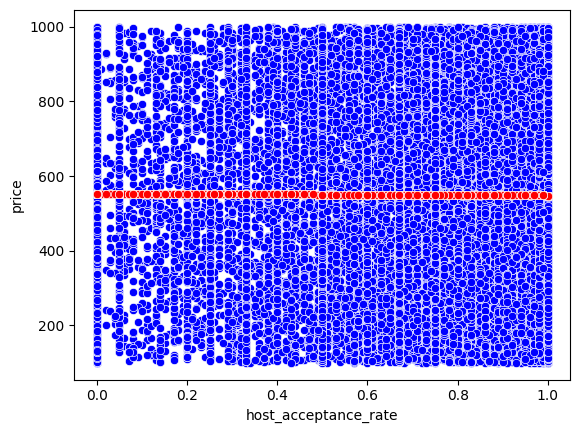

In [21]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

In [22]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

8.154697092277452e-05

In [23]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.009030336146720925)

In [24]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_26408\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [25]:
df['room_type'] = 1

In [26]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

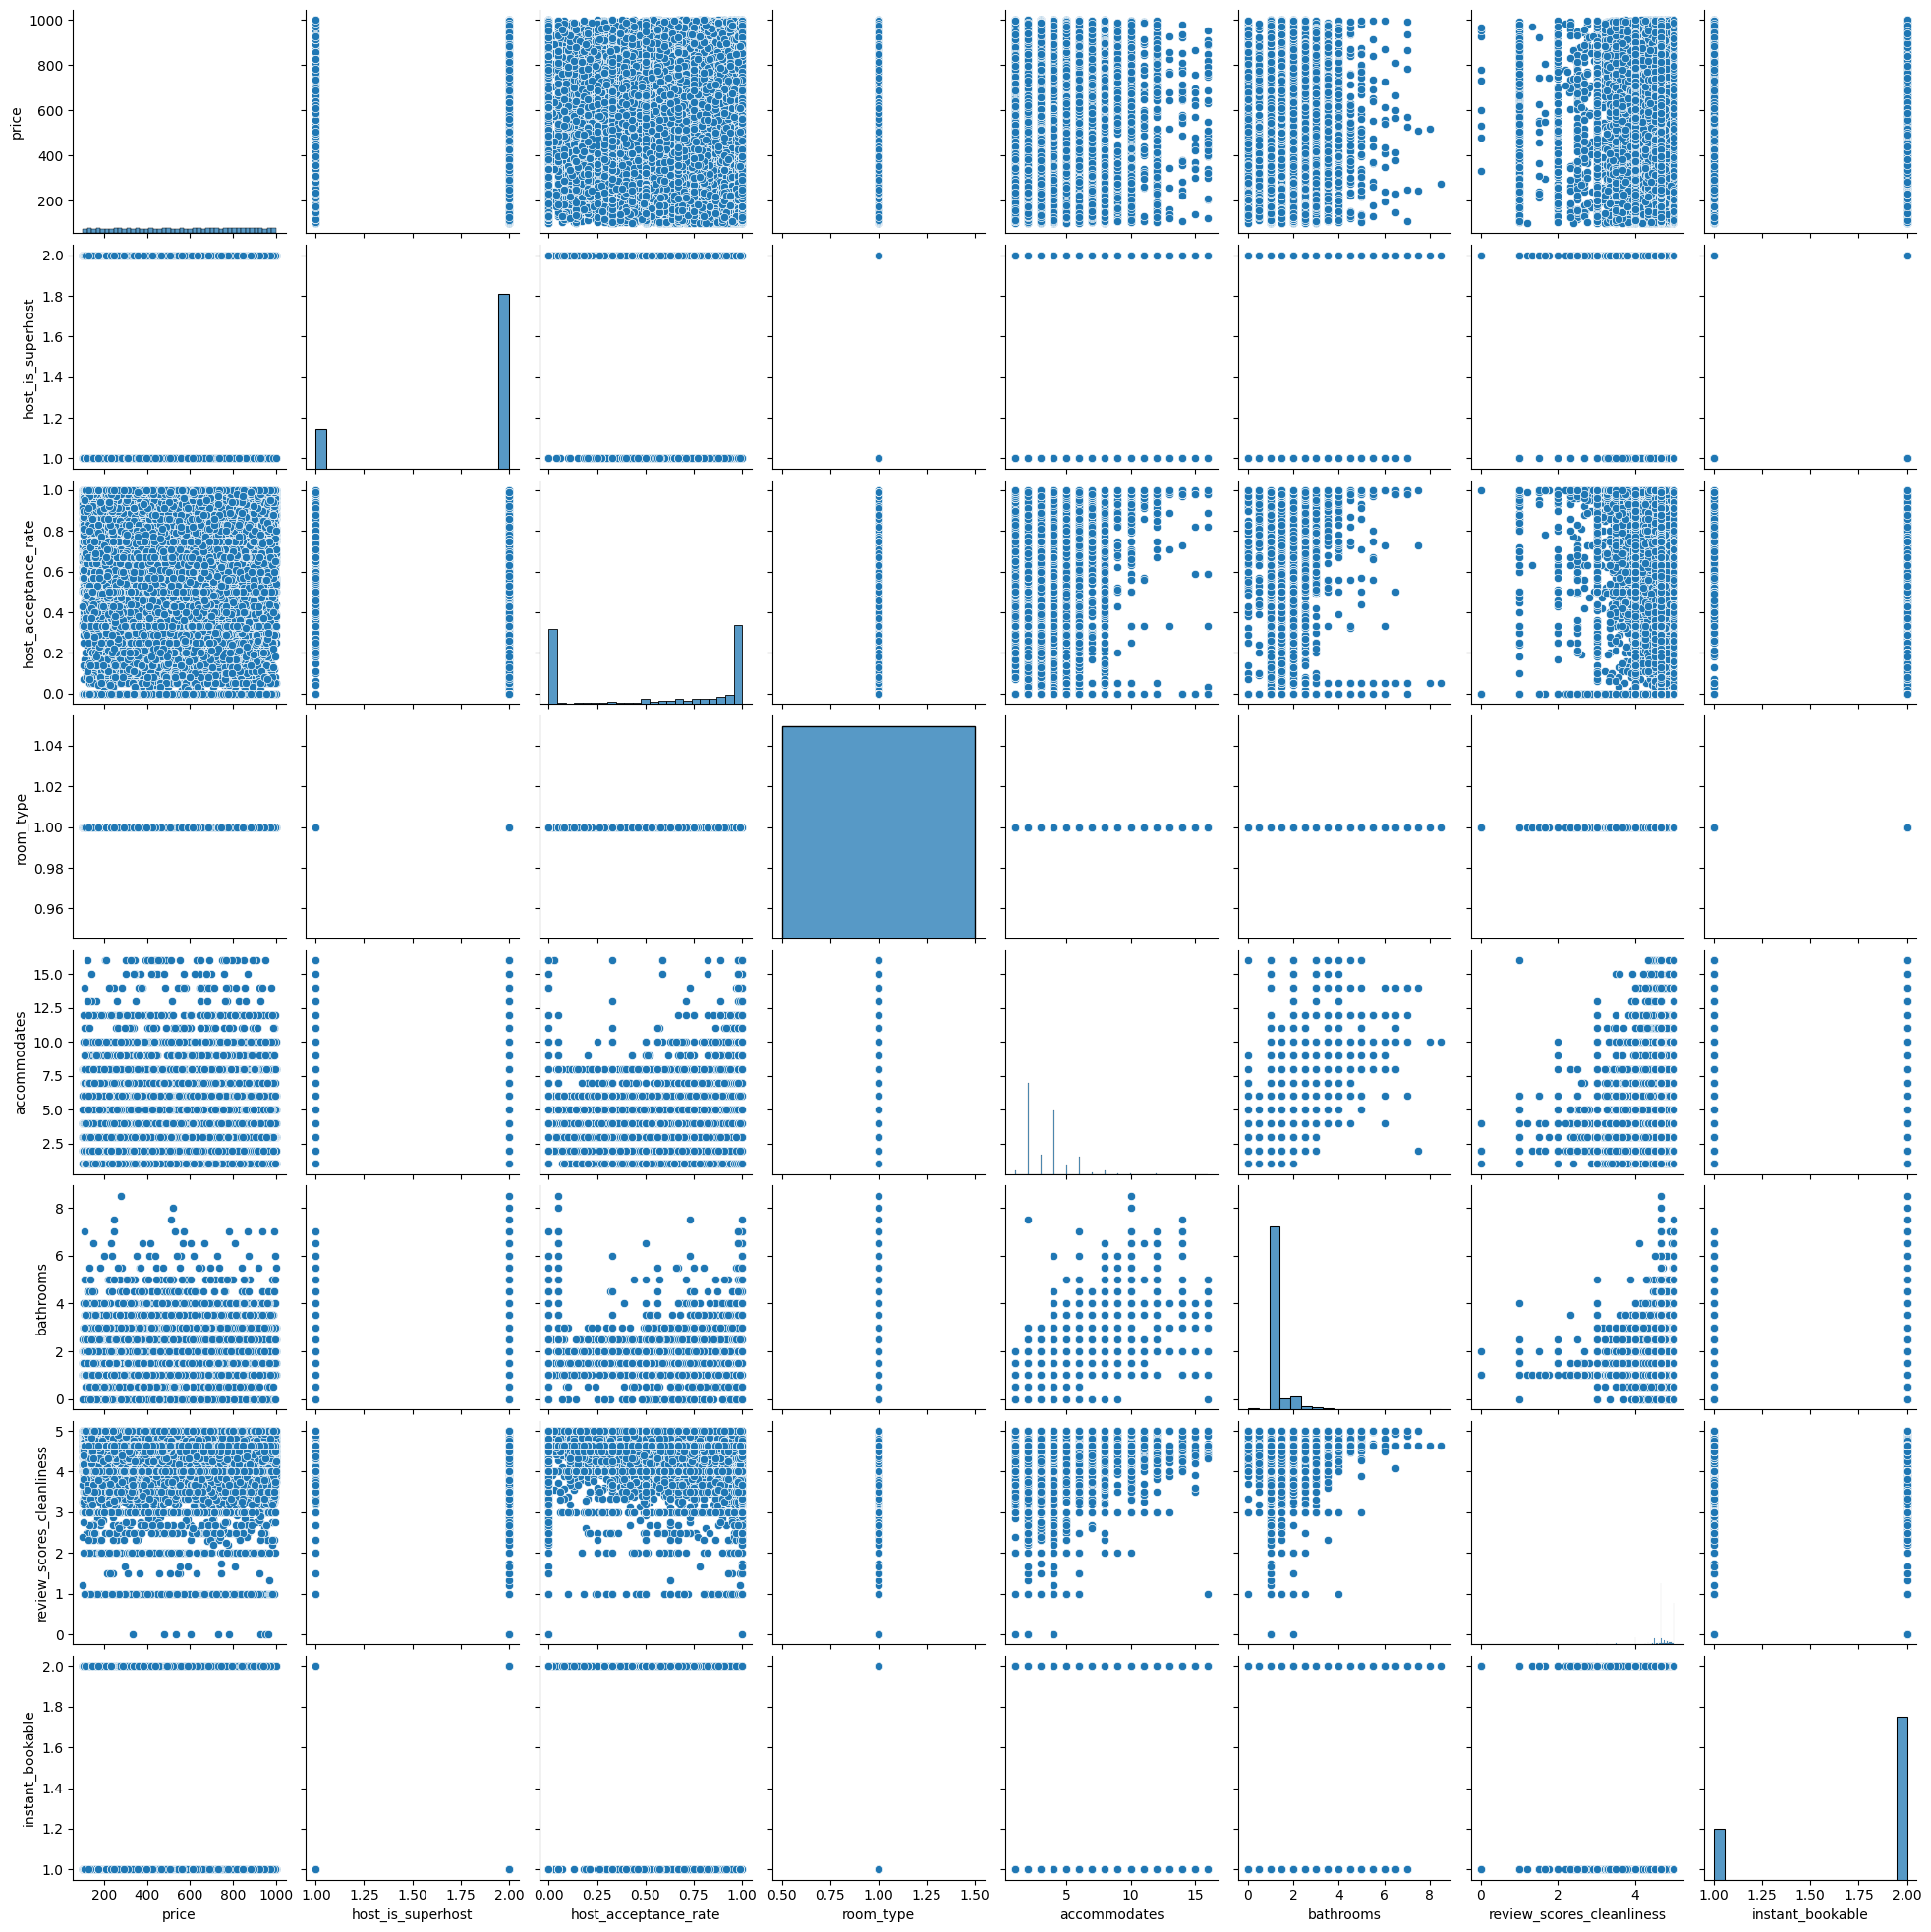

In [27]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [31]:
# Reemplazar 'No Hay' por 0
df.replace('No Hay', 0, inplace=True)

# Reemplazar NaN por 0
df.fillna(0, inplace=True)

# Verificar que no haya NaN
print(df.isna().sum().sum())  # Debería imprimir 0 si no hay NaN

0


C:\Users\joker\AppData\Local\Temp\ipykernel_26408\238324549.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('No Hay', 0, inplace=True)
C:\Users\joker\AppData\Local\Temp\ipykernel_26408\238324549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No Hay', 0, inplace=True)
C:\Users\joker\AppData\Local\Temp\ipykernel_26408\238324549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [32]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.000436             -0.009030   
host_is_superhost          0.000436           1.000000             -0.351795   
host_acceptance_rate      -0.009030          -0.351795              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates              -0.006100          -0.027441              0.075932   
bathrooms                 -0.008565          -0.077233              0.096051   
review_scores_cleanliness  0.002640          -0.147408              0.043986   
host_identity_verified    -0.000716           0.097210             -0.180940   
instant_bookable           0.009435           0.028728             -0.249510   

                           room_type  accommodates  bathrooms  \
price                            NaN     -0.006100  -0.008565   
host_is_superhost                NaN     -0.027441  -0.077233   
host_acceptance_rate             NaN      0.075932   0.096051   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.505219   
bathrooms                        NaN      0.505219   1.000000   
review_scores_cleanliness        NaN      0.007944   0.047725   
host_identity_verified           NaN     -0.043595  -0.048969   
instant_bookable                 NaN     -0.098963  -0.079960   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.002640               -0.000716   
host_is_superhost                          -0.147408                0.097210   
host_acceptance_rate                        0.043986               -0.180940   
room_type                                        NaN                     NaN   
accommodates                                0.007944               -0.043595   
bathrooms                                   0.047725               -0.048969   
review_scores_cleanliness                   1.000000               -0.013670   
host_identity_verified                     -0.013670                1.000000   
instant_bookable                            0.065849                0.057588   

                           instant_bookable  
price                              0.009435  
host_is_superhost                  0.028728  
host_acceptance_rate              -0.249510  
room_type                               NaN  
accommodates                      -0.098963  
bathrooms                         -0.079960  
review_scores_cleanliness          0.065849  
host_identity_verified             0.057588  
instant_bookable                   1.000000

In [33]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.000436              0.009030   
host_is_superhost          0.000436           1.000000              0.351795   
host_acceptance_rate       0.009030           0.351795              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.006100           0.027441              0.075932   
bathrooms                  0.008565           0.077233              0.096051   
review_scores_cleanliness  0.002640           0.147408              0.043986   
host_identity_verified     0.000716           0.097210              0.180940   
instant_bookable           0.009435           0.028728              0.249510   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.006100   0.008565   
host_is_superhost                NaN      0.027441   0.077233   
host_acceptance_rate             NaN      0.075932   0.096051   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.505219   
bathrooms                        NaN      0.505219   1.000000   
review_scores_cleanliness        NaN      0.007944   0.047725   
host_identity_verified           NaN      0.043595   0.048969   
instant_bookable                 NaN      0.098963   0.079960   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.002640                0.000716   
host_is_superhost                           0.147408                0.097210   
host_acceptance_rate                        0.043986                0.180940   
room_type                                        NaN                     NaN   
accommodates                                0.007944                0.043595   
bathrooms                                   0.047725                0.048969   
review_scores_cleanliness                   1.000000                0.013670   
host_identity_verified                      0.013670                1.000000   
instant_bookable                            0.065849                0.057588   

                           instant_bookable  
price                              0.009435  
host_is_superhost                  0.028728  
host_acceptance_rate               0.249510  
room_type                               NaN  
accommodates                       0.098963  
bathrooms                          0.079960  
review_scores_cleanliness          0.065849  
host_identity_verified             0.057588  
instant_bookable                   1.000000

<Axes: >

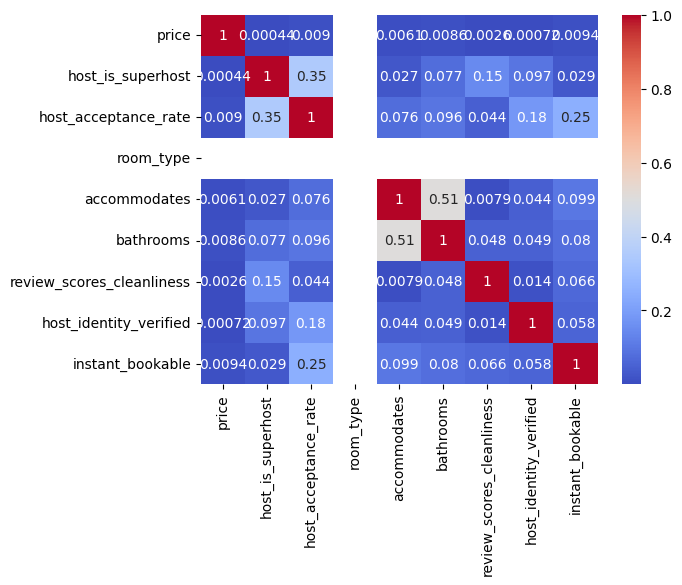

In [34]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

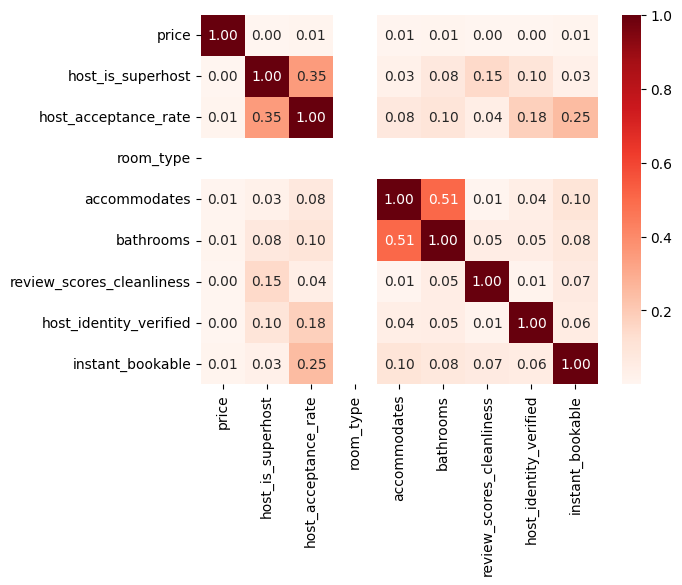

In [35]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

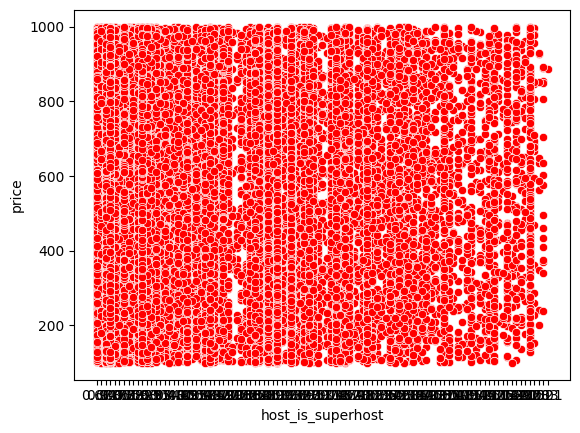

In [36]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [37]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [40]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29403802]),
 'rank_': 1,
 'singular_': array([112.59078197]),
 'intercept_': np.float64(549.8085460660524)}

In [41]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

1.898921911935858e-07

In [42]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([550.3966221 , 550.10258408, 550.10258408, ..., 550.3966221 ,
       550.3966221 , 550.3966221 ], shape=(85268,))

In [43]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost host_acceptance_rate  \
0        550.396622  640.48                  2                 0.67   
1        550.102584  891.52                  1                 0.94   
2        550.102584  631.06                  1                 0.67   
3        550.396622  735.87                  2                  0.0   
4        550.396622  840.11                  2                  0.0   
...             ...     ...                ...                  ...   
85263    550.396622  744.47                  2                 0.53   
85264    550.102584  611.04                  1                 0.99   
85265    550.396622  881.75                  2                 0.99   
85266    550.396622  685.72                  2                 0.08   
85267    550.396622  504.30                  2                 0.99   

       room_type  accommodates  bathrooms  review_scores_cleanliness  \
0              1             2        1.0                       5.00   
1              1             2        1.0                       4.59   
2              1             4        1.0                       4.45   
3              1             3        1.0                       5.00   
4              1             6        1.0                       4.65   
...          ...           ...        ...                        ...   
85263          1             4        1.0                       4.65   
85264          1             4        1.0                       5.00   
85265          1             6        2.5                       4.65   
85266          1             1        1.0                       4.65   
85267          1             2        1.0                       4.65   

       host_identity_verified  instant_bookable  
0                           1                 1  
1                           1                 2  
2                           1                 2  
3                           1                 2  
4                           1                 2  
...                       ...               ...  
85263                       1                 2  
85264                       1                 1  
85265                       1                 1  
85266                       1                 2  
85267                       1                 1  

[85268 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

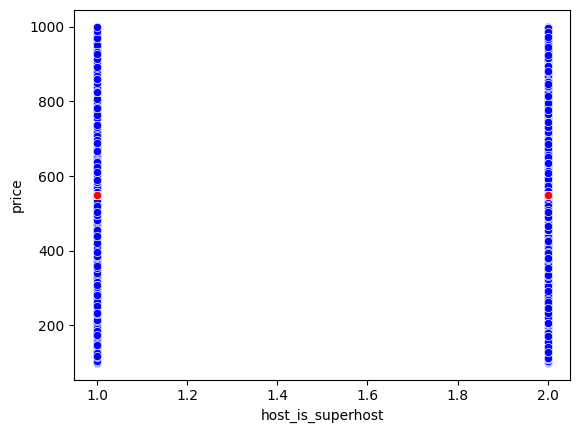

In [44]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

In [45]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

1.898921911935858e-07

In [46]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.00043576621162451986)

Accomodates Vs Bathrooms

In [47]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

In [48]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
type(model)

sklearn.linear_model._base.LinearRegression

In [51]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [52]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.08717233]),
 'rank_': 1,
 'singular_': array([127.91527192]),
 'intercept_': np.float64(556.1479775400971)}

In [53]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

7.336554828230035e-05

In [54]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([551.06080521, 551.06080521, 551.06080521, ..., 543.43004672,
       551.06080521, 551.06080521], shape=(85268,))

In [55]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)
df

Predicciones2  Predicciones   price  host_is_superhost  \
0         551.060805    550.396622  640.48                  2   
1         551.060805    550.102584  891.52                  1   
2         551.060805    550.102584  631.06                  1   
3         551.060805    550.396622  735.87                  2   
4         551.060805    550.396622  840.11                  2   
...              ...           ...     ...                ...   
85263     551.060805    550.396622  744.47                  2   
85264     551.060805    550.102584  611.04                  1   
85265     543.430047    550.396622  881.75                  2   
85266     551.060805    550.396622  685.72                  2   
85267     551.060805    550.396622  504.30                  2   

      host_acceptance_rate  room_type  accommodates  bathrooms  \
0                     0.67          1             2        1.0   
1                     0.94          1             2        1.0   
2                     0.67          1             4        1.0   
3                      0.0          1             3        1.0   
4                      0.0          1             6        1.0   
...                    ...        ...           ...        ...   
85263                 0.53          1             4        1.0   
85264                 0.99          1             4        1.0   
85265                 0.99          1             6        2.5   
85266                 0.08          1             1        1.0   
85267                 0.99          1             2        1.0   

       review_scores_cleanliness  host_identity_verified  instant_bookable  
0                           5.00                       1                 1  
1                           4.59                       1                 2  
2                           4.45                       1                 2  
3                           5.00                       1                 2  
4                           4.65                       1                 2  
...                          ...                     ...               ...  
85263                       4.65                       1                 2  
85264                       5.00                       1                 1  
85265                       4.65                       1                 1  
85266                       4.65                       1                 2  
85267                       4.65                       1                 1  

[85268 rows x 11 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

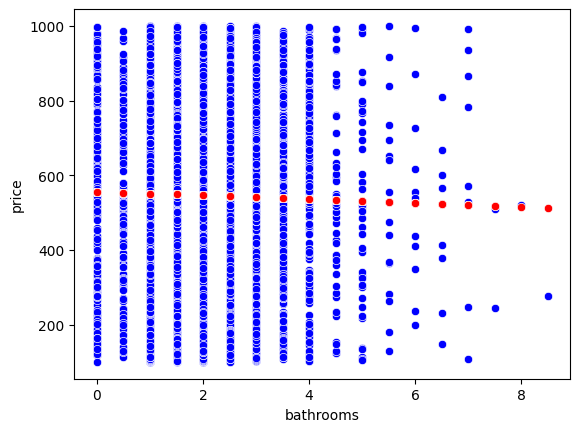

In [56]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='red',data = df)

In [57]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

7.336554828230035e-05

In [58]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.008565369127031265)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

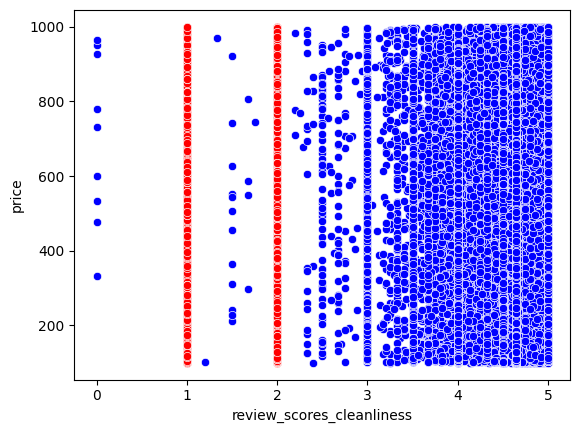

In [59]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

In [60]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
type(model)

sklearn.linear_model._base.LinearRegression

In [63]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [64]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.75752109]),
 'rank_': 1,
 'singular_': array([114.09911605]),
 'intercept_': np.float64(542.1707053750587)}

In [65]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

6.967229562615529e-06

In [66]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([550.95831081, 550.23772717, 549.99167421, ..., 550.34317843,
       550.34317843, 550.34317843], shape=(85268,))

In [67]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0         550.958311     551.060805    550.396622  640.48                  2   
1         550.237727     551.060805    550.102584  891.52                  1   
2         549.991674     551.060805    550.102584  631.06                  1   
3         550.958311     551.060805    550.396622  735.87                  2   
4         550.343178     551.060805    550.396622  840.11                  2   
...              ...            ...           ...     ...                ...   
85263     550.343178     551.060805    550.396622  744.47                  2   
85264     550.958311     551.060805    550.102584  611.04                  1   
85265     550.343178     543.430047    550.396622  881.75                  2   
85266     550.343178     551.060805    550.396622  685.72                  2   
85267     550.343178     551.060805    550.396622  504.30                  2   

      host_acceptance_rate  room_type  accommodates  bathrooms  \
0                     0.67          1             2        1.0   
1                     0.94          1             2        1.0   
2                     0.67          1             4        1.0   
3                      0.0          1             3        1.0   
4                      0.0          1             6        1.0   
...                    ...        ...           ...        ...   
85263                 0.53          1             4        1.0   
85264                 0.99          1             4        1.0   
85265                 0.99          1             6        2.5   
85266                 0.08          1             1        1.0   
85267                 0.99          1             2        1.0   

       review_scores_cleanliness  host_identity_verified  instant_bookable  
0                           5.00                       1                 1  
1                           4.59                       1                 2  
2                           4.45                       1                 2  
3                           5.00                       1                 2  
4                           4.65                       1                 2  
...                          ...                     ...               ...  
85263                       4.65                       1                 2  
85264                       5.00                       1                 1  
85265                       4.65                       1                 1  
85266                       4.65                       1                 2  
85267                       4.65                       1                 1  

[85268 rows x 12 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

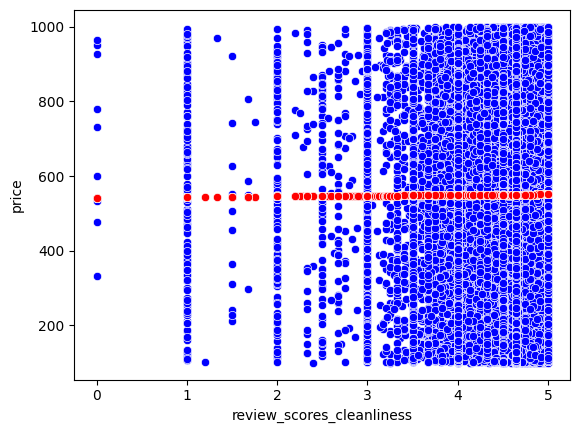

In [68]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

In [69]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

6.967229562615529e-06

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0026395510153462707)

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

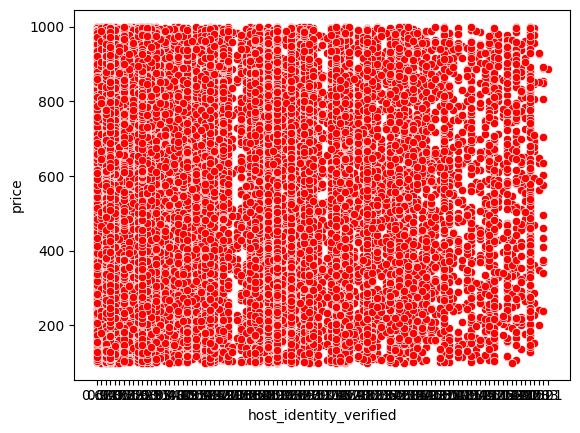

In [71]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [72]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [74]:
type(model)

sklearn.linear_model._base.LinearRegression

In [75]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [76]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.64093825]),
 'rank_': 1,
 'singular_': array([84.81697338]),
 'intercept_': np.float64(551.0436513204968)}

In [77]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

5.120264467972646e-07

In [78]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([550.40271307, 550.40271307, 550.40271307, ..., 550.40271307,
       550.40271307, 550.40271307], shape=(85268,))

In [79]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0         550.402713     550.958311     551.060805    550.396622  640.48   
1         550.402713     550.237727     551.060805    550.102584  891.52   
2         550.402713     549.991674     551.060805    550.102584  631.06   
3         550.402713     550.958311     551.060805    550.396622  735.87   
4         550.402713     550.343178     551.060805    550.396622  840.11   
...              ...            ...            ...           ...     ...   
85263     550.402713     550.343178     551.060805    550.396622  744.47   
85264     550.402713     550.958311     551.060805    550.102584  611.04   
85265     550.402713     550.343178     543.430047    550.396622  881.75   
85266     550.402713     550.343178     551.060805    550.396622  685.72   
85267     550.402713     550.343178     551.060805    550.396622  504.30   

       host_is_superhost host_acceptance_rate  room_type  accommodates  \
0                      2                 0.67          1             2   
1                      1                 0.94          1             2   
2                      1                 0.67          1             4   
3                      2                  0.0          1             3   
4                      2                  0.0          1             6   
...                  ...                  ...        ...           ...   
85263                  2                 0.53          1             4   
85264                  1                 0.99          1             4   
85265                  2                 0.99          1             6   
85266                  2                 0.08          1             1   
85267                  2                 0.99          1             2   

       bathrooms  review_scores_cleanliness  host_identity_verified  \
0            1.0                       5.00                       1   
1            1.0                       4.59                       1   
2            1.0                       4.45                       1   
3            1.0                       5.00                       1   
4            1.0                       4.65                       1   
...          ...                        ...                     ...   
85263        1.0                       4.65                       1   
85264        1.0                       5.00                       1   
85265        2.5                       4.65                       1   
85266        1.0                       4.65                       1   
85267        1.0                       4.65                       1   

       instant_bookable  
0                     1  
1                     2  
2                     2  
3                     2  
4                     2  
...                 ...  
85263                 2  
85264                 1  
85265                 1  
85266                 2  
85267                 1  

[85268 rows x 13 columns]

<Axes: xlabel='host_identity_verified', ylabel='price'>

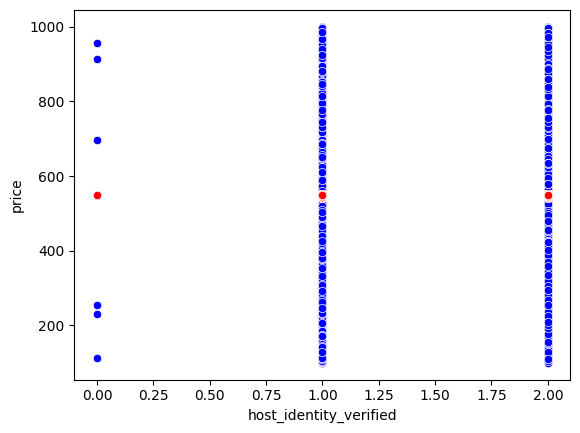

In [80]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones3',color='red',data = df)

In [81]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

5.120264467972646e-07

In [82]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0007155602328226916)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

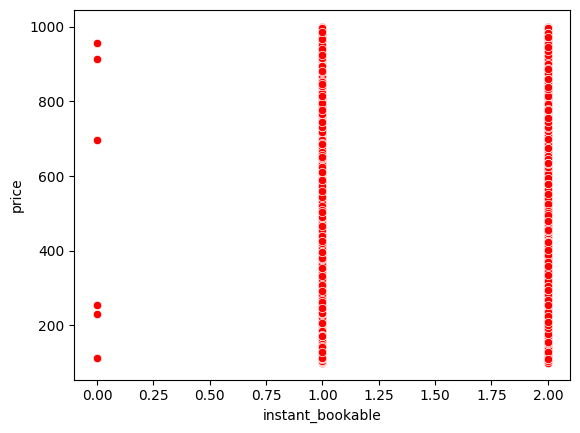

In [83]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [84]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [86]:
type(model)

sklearn.linear_model._base.LinearRegression

In [87]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [88]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.76986368]),
 'rank_': 1,
 'singular_': array([124.22970686]),
 'intercept_': np.float64(540.1727254019031)}

In [89]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

8.901772620650839e-05

In [90]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([545.94258908, 551.71245275, 551.71245275, ..., 545.94258908,
       551.71245275, 545.94258908], shape=(85268,))

In [91]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  \
0         545.942589     550.402713     550.958311     551.060805   
1         551.712453     550.402713     550.237727     551.060805   
2         551.712453     550.402713     549.991674     551.060805   
3         551.712453     550.402713     550.958311     551.060805   
4         551.712453     550.402713     550.343178     551.060805   
...              ...            ...            ...            ...   
85263     551.712453     550.402713     550.343178     551.060805   
85264     545.942589     550.402713     550.958311     551.060805   
85265     545.942589     550.402713     550.343178     543.430047   
85266     551.712453     550.402713     550.343178     551.060805   
85267     545.942589     550.402713     550.343178     551.060805   

       Predicciones   price  host_is_superhost host_acceptance_rate  \
0        550.396622  640.48                  2                 0.67   
1        550.102584  891.52                  1                 0.94   
2        550.102584  631.06                  1                 0.67   
3        550.396622  735.87                  2                  0.0   
4        550.396622  840.11                  2                  0.0   
...             ...     ...                ...                  ...   
85263    550.396622  744.47                  2                 0.53   
85264    550.102584  611.04                  1                 0.99   
85265    550.396622  881.75                  2                 0.99   
85266    550.396622  685.72                  2                 0.08   
85267    550.396622  504.30                  2                 0.99   

       room_type  accommodates  bathrooms  review_scores_cleanliness  \
0              1             2        1.0                       5.00   
1              1             2        1.0                       4.59   
2              1             4        1.0                       4.45   
3              1             3        1.0                       5.00   
4              1             6        1.0                       4.65   
...          ...           ...        ...                        ...   
85263          1             4        1.0                       4.65   
85264          1             4        1.0                       5.00   
85265          1             6        2.5                       4.65   
85266          1             1        1.0                       4.65   
85267          1             2        1.0                       4.65   

       host_identity_verified  instant_bookable  
0                           1                 1  
1                           1                 2  
2                           1                 2  
3                           1                 2  
4                           1                 2  
...                       ...               ...  
85263                       1                 2  
85264                       1                 1  
85265                       1                 1  
85266                       1                 2  
85267                       1                 1  

[85268 rows x 14 columns]

<Axes: xlabel='instant_bookable', ylabel='price'>

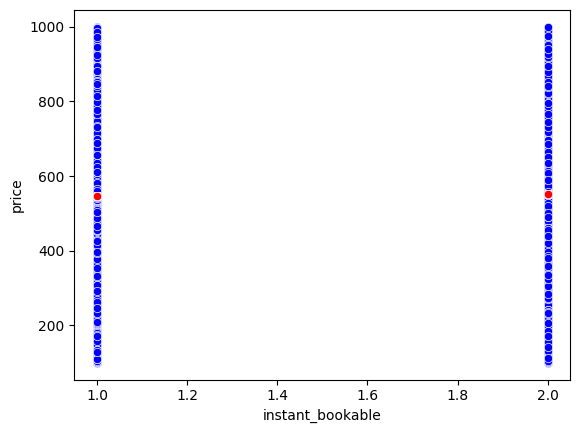

In [92]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [93]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

8.901772620650839e-05

In [94]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.009434920572347622)